In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
loan_dataset = pd.read_csv('dataset.csv')

In [ ]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [ ]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [ ]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

C:\Users\2023a\AppData\Local\Temp\ipykernel_17716\474101102.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [ ]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [ ]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [ ]:
# dependent values
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

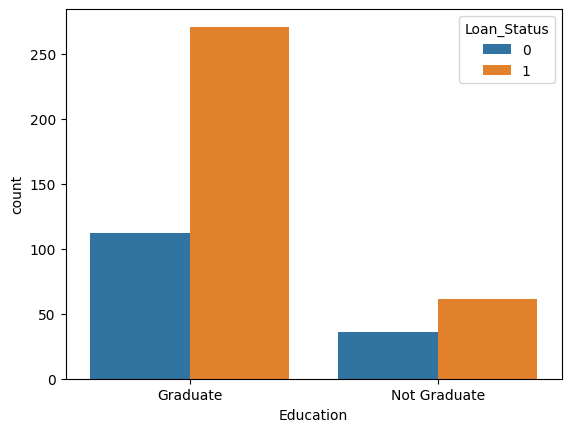

In [ ]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

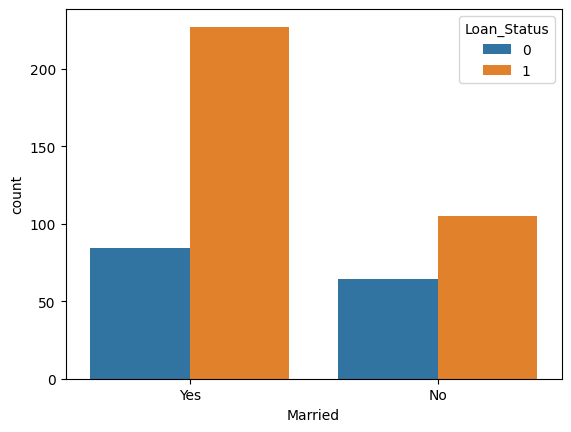

In [ ]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [ ]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

C:\Users\2023a\AppData\Local\Temp\ipykernel_17716\2432111705.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [ ]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


## Model Comparison: Logistic Regression, SVM, KNN, and Decision Tree

Let's compare the performance of different machine learning algorithms on the same dataset.

### Logistic Regression Model

In [ ]:
classifier = LogisticRegression()

In [ ]:
#training the Logistic Regression model
classifier.fit(X_train,Y_train)

c:\Users\2023a\OneDrive\Documents\project\AI\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8009259259259259


In [ ]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


In [ ]:
# Import additional libraries for confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 9  6]
 [ 2 31]]


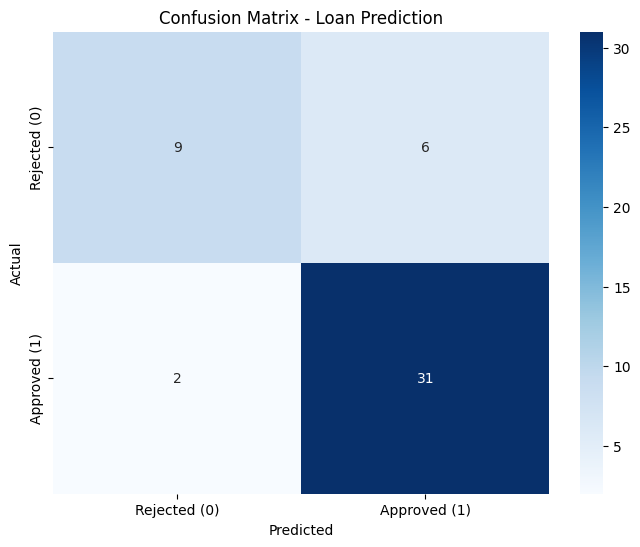

In [ ]:
# Plot confusion matrix with matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Rejected (0)', 'Approved (1)'], 
            yticklabels=['Rejected (0)', 'Approved (1)'])
plt.title('Confusion Matrix - Loan Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Calculate and display additional metrics
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

print("\nClassification Report:")
print(classification_report(Y_test, X_test_prediction, target_names=['Rejected', 'Approved']))

print(f"\nPrecision: {precision_score(Y_test, X_test_prediction):.4f}")
print(f"Recall: {recall_score(Y_test, X_test_prediction):.4f}")
print(f"F1-Score: {f1_score(Y_test, X_test_prediction):.4f}")


Classification Report:
              precision    recall  f1-score   support

    Rejected       0.82      0.60      0.69        15
    Approved       0.84      0.94      0.89        33

    accuracy                           0.83        48
   macro avg       0.83      0.77      0.79        48
weighted avg       0.83      0.83      0.83        48


Precision: 0.8378
Recall: 0.9394
F1-Score: 0.8857


### Support Vector Machine (SVM) Model

In [ ]:
# Support Vector Machine Model
svm_classifier = SVC(kernel='linear', random_state=2)
svm_classifier.fit(X_train, Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
# SVM Predictions and Accuracy
svm_train_prediction = svm_classifier.predict(X_train)
svm_test_prediction = svm_classifier.predict(X_test)

svm_train_accuracy = accuracy_score(svm_train_prediction, Y_train)
svm_test_accuracy = accuracy_score(svm_test_prediction, Y_test)

print('SVM - Accuracy on training data:', svm_train_accuracy)
print('SVM - Accuracy on test data:', svm_test_accuracy)

SVM - Accuracy on training data: 0.7986111111111112
SVM - Accuracy on test data: 0.8333333333333334


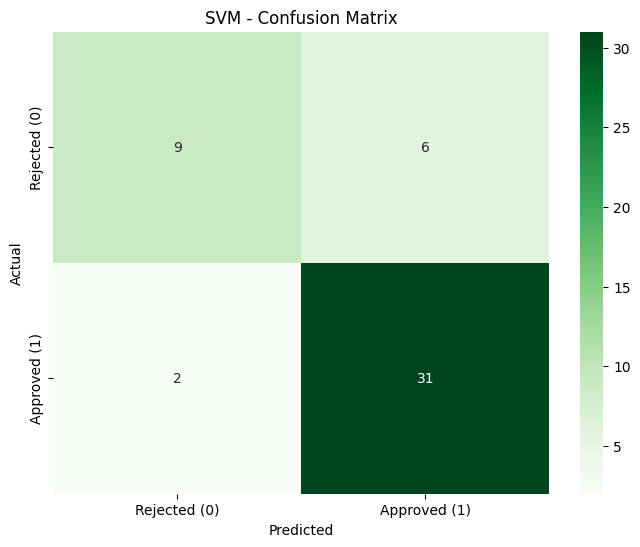


SVM - Classification Report:
              precision    recall  f1-score   support

    Rejected       0.82      0.60      0.69        15
    Approved       0.84      0.94      0.89        33

    accuracy                           0.83        48
   macro avg       0.83      0.77      0.79        48
weighted avg       0.83      0.83      0.83        48



In [ ]:
# SVM Confusion Matrix
svm_cm = confusion_matrix(Y_test, svm_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Rejected (0)', 'Approved (1)'], 
            yticklabels=['Rejected (0)', 'Approved (1)'])
plt.title('SVM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nSVM - Classification Report:")
print(classification_report(Y_test, svm_test_prediction, target_names=['Rejected', 'Approved']))

### K-Nearest Neighbors (KNN) Model

In [ ]:
# K-Nearest Neighbors Model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
# KNN Predictions and Accuracy
knn_train_prediction = knn_classifier.predict(X_train)
knn_test_prediction = knn_classifier.predict(X_test)

knn_train_accuracy = accuracy_score(knn_train_prediction, Y_train)
knn_test_accuracy = accuracy_score(knn_test_prediction, Y_test)

print('KNN - Accuracy on training data:', knn_train_accuracy)
print('KNN - Accuracy on test data:', knn_test_accuracy)

KNN - Accuracy on training data: 0.7430555555555556
KNN - Accuracy on test data: 0.6666666666666666


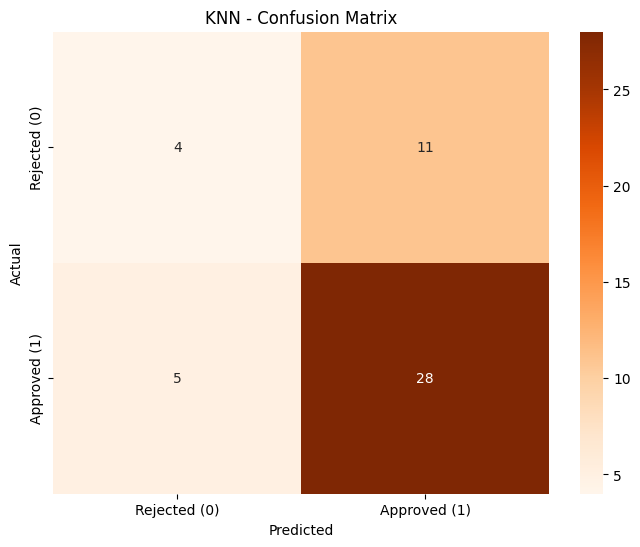


KNN - Classification Report:
              precision    recall  f1-score   support

    Rejected       0.44      0.27      0.33        15
    Approved       0.72      0.85      0.78        33

    accuracy                           0.67        48
   macro avg       0.58      0.56      0.56        48
weighted avg       0.63      0.67      0.64        48



In [ ]:
# KNN Confusion Matrix
knn_cm = confusion_matrix(Y_test, knn_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Rejected (0)', 'Approved (1)'], 
            yticklabels=['Rejected (0)', 'Approved (1)'])
plt.title('KNN - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nKNN - Classification Report:")
print(classification_report(Y_test, knn_test_prediction, target_names=['Rejected', 'Approved']))

### Decision Tree Model

In [ ]:
# Decision Tree Model
dt_classifier = DecisionTreeClassifier(random_state=2)
dt_classifier.fit(X_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
# Decision Tree Predictions and Accuracy
dt_train_prediction = dt_classifier.predict(X_train)
dt_test_prediction = dt_classifier.predict(X_test)

dt_train_accuracy = accuracy_score(dt_train_prediction, Y_train)
dt_test_accuracy = accuracy_score(dt_test_prediction, Y_test)

print('Decision Tree - Accuracy on training data:', dt_train_accuracy)
print('Decision Tree - Accuracy on test data:', dt_test_accuracy)

Decision Tree - Accuracy on training data: 1.0
Decision Tree - Accuracy on test data: 0.75
 1.0
Decision Tree - Accuracy on test data: 0.75


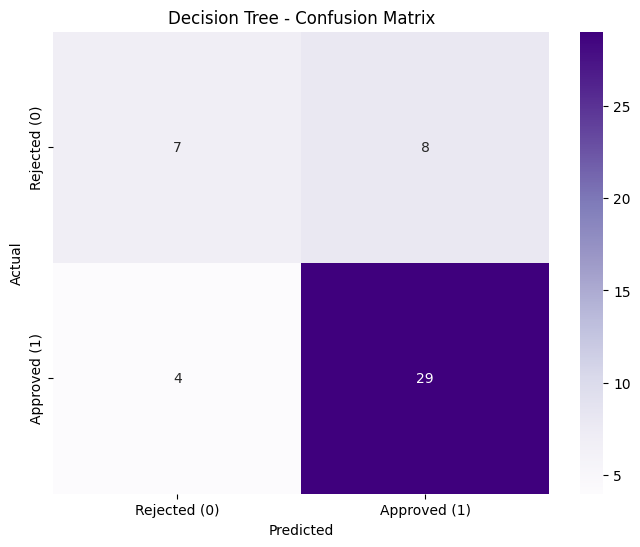


Decision Tree - Classification Report:
              precision    recall  f1-score   support

    Rejected       0.64      0.47      0.54        15
    Approved       0.78      0.88      0.83        33

    accuracy                           0.75        48
   macro avg       0.71      0.67      0.68        48
weighted avg       0.74      0.75      0.74        48



In [ ]:
# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(Y_test, dt_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Rejected (0)', 'Approved (1)'], 
            yticklabels=['Rejected (0)', 'Approved (1)'])
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nDecision Tree - Classification Report:")
print(classification_report(Y_test, dt_test_prediction, target_names=['Rejected', 'Approved']))

### Model Performance Comparison

In [ ]:
# Create a comparison dataframe
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree'],
    'Training Accuracy': [training_data_accuray, svm_train_accuracy, knn_train_accuracy, dt_train_accuracy],
    'Test Accuracy': [test_data_accuray, svm_test_accuracy, knn_test_accuracy, dt_test_accuracy]
})

print("Model Performance Comparison:")
print(models_comparison)
print("\n" + "="*50)

Model Performance Comparison:
                 Model  Training Accuracy  Test Accuracy
0  Logistic Regression           0.800926       0.833333
1                  SVM           0.798611       0.833333
2                  KNN           0.743056       0.666667
3        Decision Tree           1.000000       0.750000



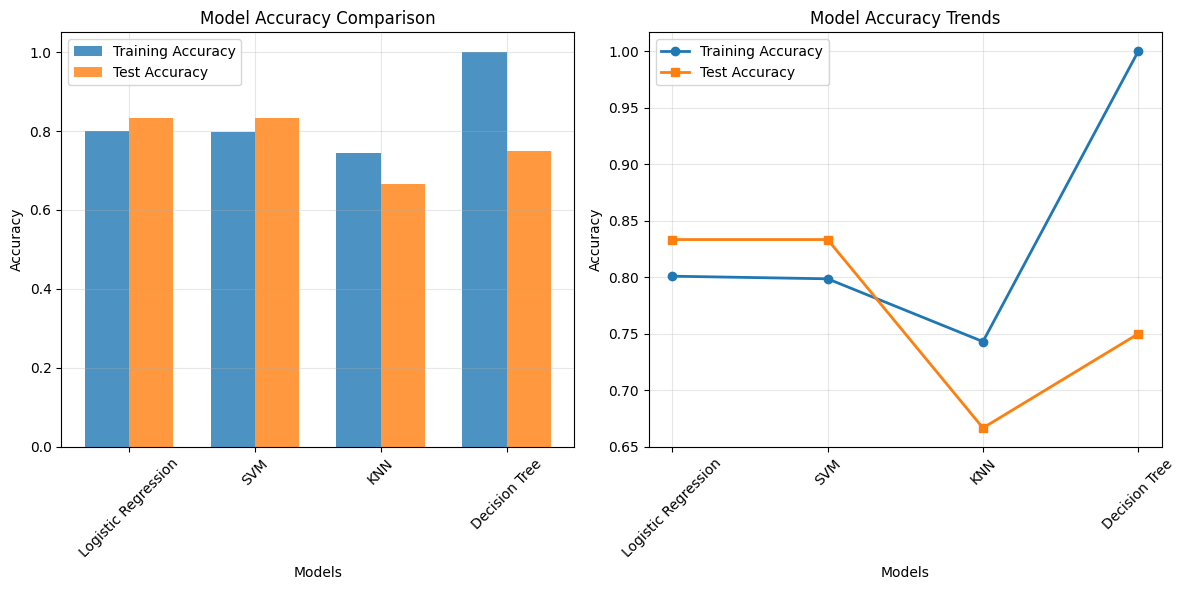

In [ ]:
# Visualize model comparison
plt.figure(figsize=(12, 6))

# Bar plot for accuracy comparison
plt.subplot(1, 2, 1)
x = np.arange(len(models_comparison['Model']))
width = 0.35

plt.bar(x - width/2, models_comparison['Training Accuracy'], width, label='Training Accuracy', alpha=0.8)
plt.bar(x + width/2, models_comparison['Test Accuracy'], width, label='Test Accuracy', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(x, models_comparison['Model'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Line plot for accuracy comparison
plt.subplot(1, 2, 2)
plt.plot(models_comparison['Model'], models_comparison['Training Accuracy'], marker='o', label='Training Accuracy', linewidth=2)
plt.plot(models_comparison['Model'], models_comparison['Test Accuracy'], marker='s', label='Test Accuracy', linewidth=2)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Trends')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()